<a href="https://colab.research.google.com/github/Deepakkarki24/Bike-Sharing-Demand-Prediction/blob/main/Deepak_Karki_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **1. Import libraries and load the dataset**

In [ ]:
# Import libararies

# for Data Manipulation
import pandas as pd
import numpy as np

# import datetime module
from datetime import datetime
import datetime as dt

# for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import scipy libraries  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats

# import ridge and lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# set data path
path = '/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECTS/CAPSTONE PROJECT 2 - Bike Sharing Demand Prediction/Csv files/SeoulBikeData.csv'


In [ ]:
# load dataset
bike_data = pd.read_csv(path, encoding='cp1252')

In [ ]:
# create a copy of dataset
df = bike_data.copy()

# **Exploratory Data Analysis**

In [ ]:
# data head()
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# data tail()
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# data shape
df.shape

(8760, 14)

In [ ]:
# get all the columns in a list format
list(df.columns)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

**Here is our all the features of the dataset**

In [ ]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

###**So we see here there 3 features which have categorical values and 1 have a datetime values rest of this 4 we have int and float kind of values.**

In [ ]:
# let see the data descriptions
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


###  1. The average temperature (mean) for the year is 12.882922 degrees. As it ranges from -17.800000 (minimum) to 39.400000 (maximum).
### 2. The average wind speed for the year is 1.724 m/s, which implies that the rented bike count is directly proportional to wind speed as on higher or max. wind speed days(7.40 m/s) the no. rented bike count(3556.00) is also max.
### 3. The average snowfall is only 0.07 cm. The maximum snowfall on a particular day is 8.80 cm, which implies that when there is heavy snowfall during the peak of winters leading to decreasing or min. the no. of rented bike count.

In [ ]:
# check null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### **Dataset have no null and missing values in the dataset**

In [ ]:
# unique values
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# check the duplicate values 
print('The duplicate values is :', df.duplicated().sum())

The duplicate values is : 0


## **Univariate Stat**

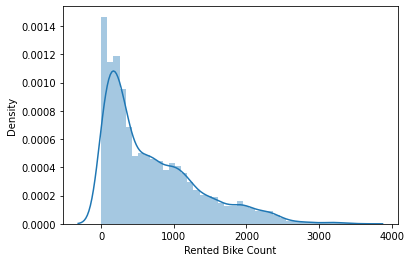

In [ ]:
#checking the density distribution of dependent variable "Rented Bike Count"
sns.distplot(df['Rented Bike Count'])

In the above observation we can clearly see that a distortion or asymmetry is deviating from the symmetrical bell curve plot by the given data, hence the distribution of the dependent variable is skewed.

So we will apply numpy.log1p() for transforming the data.

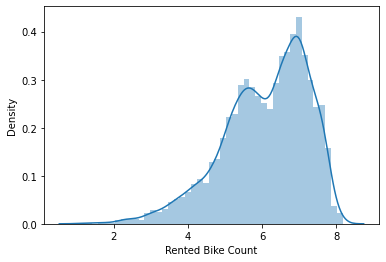

In [ ]:
#Applying numpy.log1p() transformation
sns.distplot(np.log1p(df['Rented Bike Count'].replace(0, np.nan)))

## **Visualizing Numerical Variables**

In [ ]:
#Obtaining the numerical variables
num_variables = df.describe().columns

#Converting numerical variables to list
num_variables = num_variables.to_list()

print(num_variables)

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


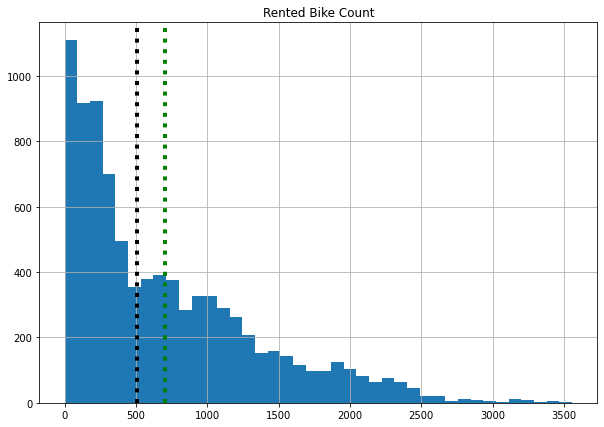

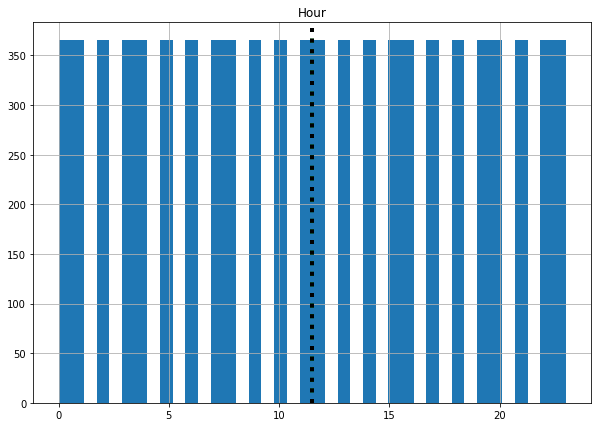

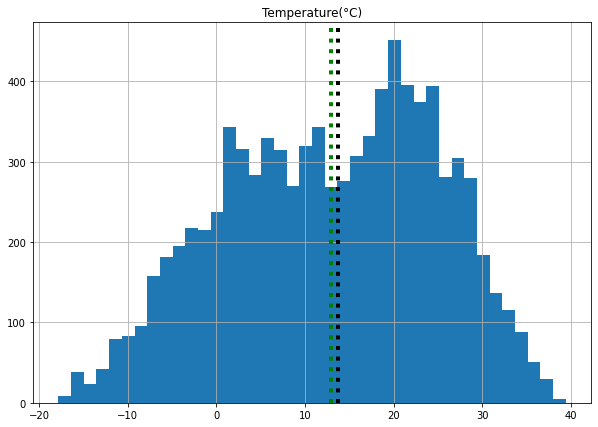

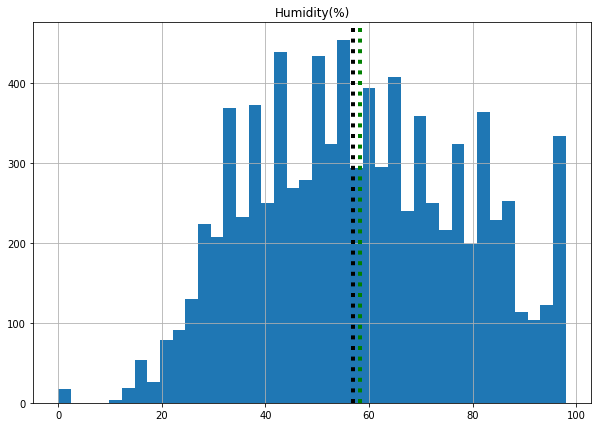

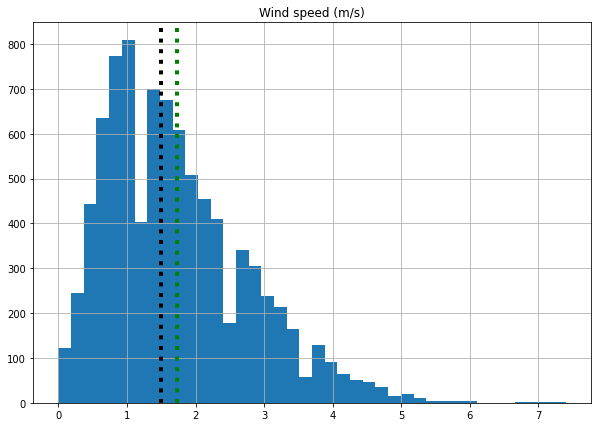

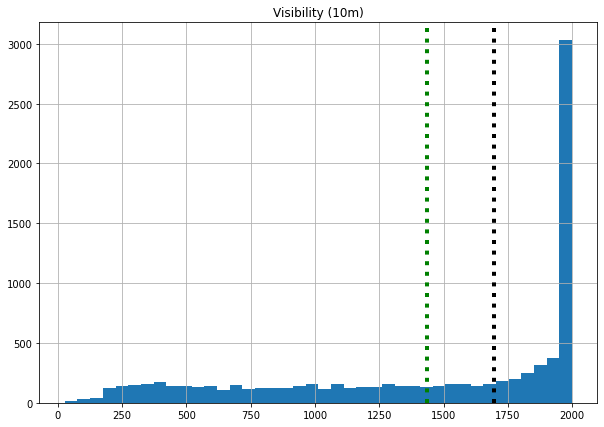

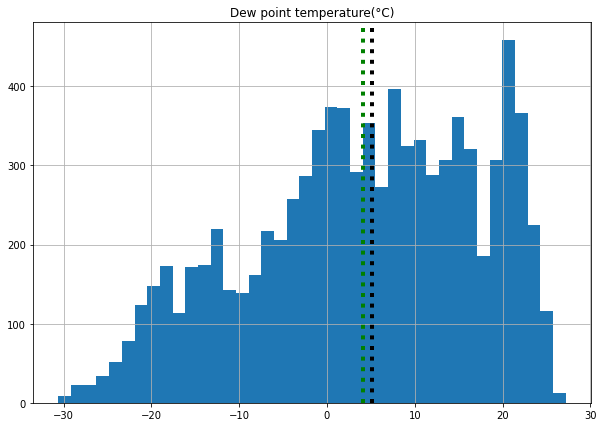

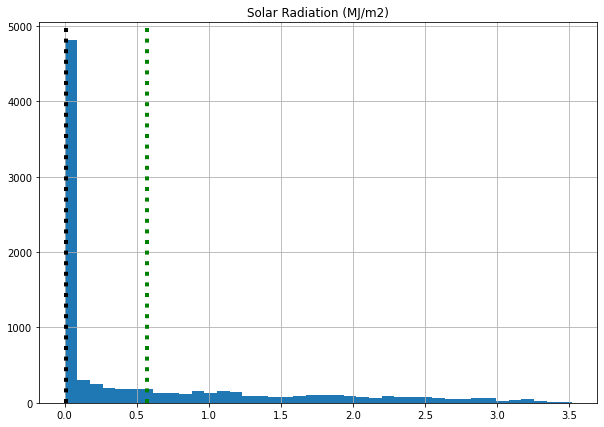

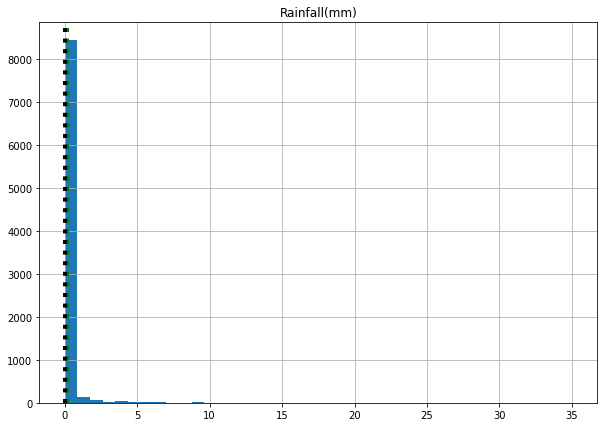

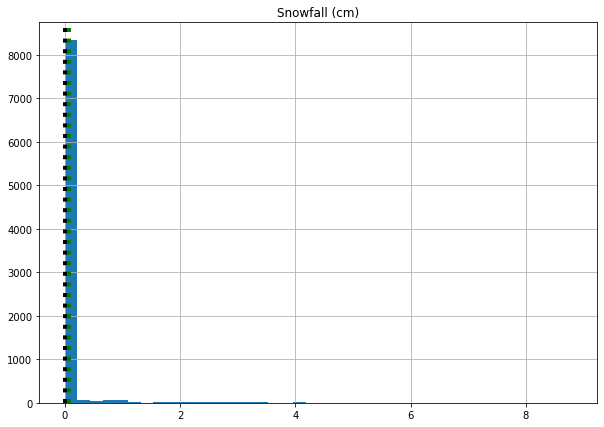

In [ ]:
from re import X
# plot a bar plot for each numerical feature count 
for col in num_variables:
    plot = plt.figure(figsize=(10, 7))
    x = plot.gca()

    #Obtaining histogram
    df[col].hist(bins=40, ax = x)

    #Show mean and median
    x.axvline(df[col].mean(), color='green', linestyle='dotted', linewidth=4)
    x.axvline(df[col].median(), color='black', linestyle='dotted', linewidth=4)    
    x.set_title(col)
#Show the graph
plt.show()

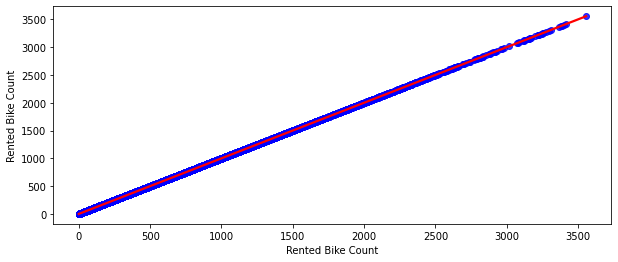

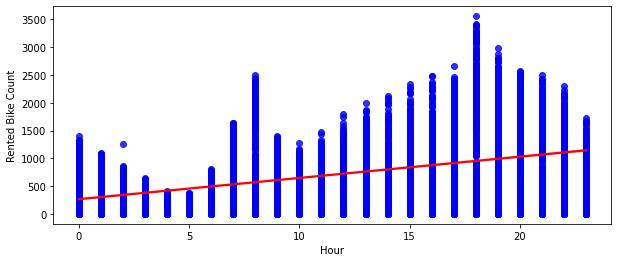

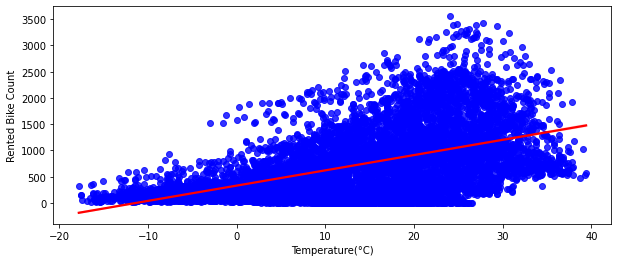

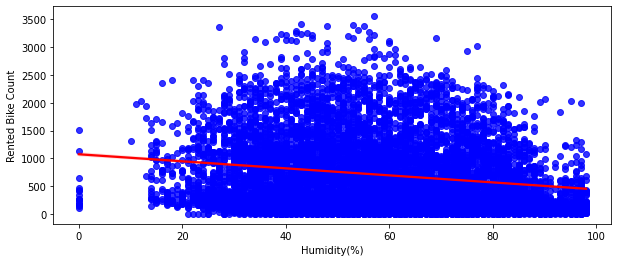

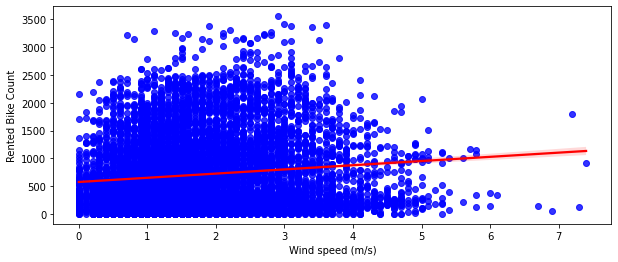

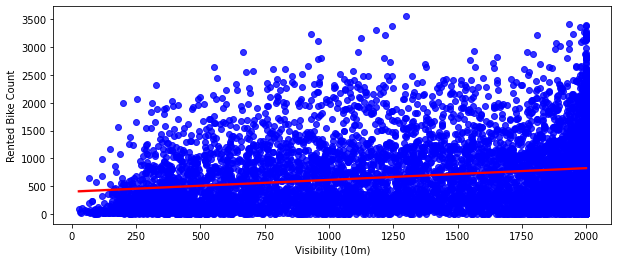

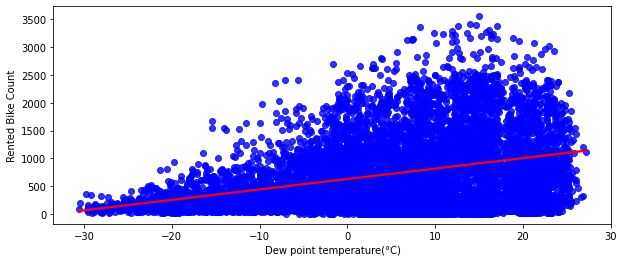

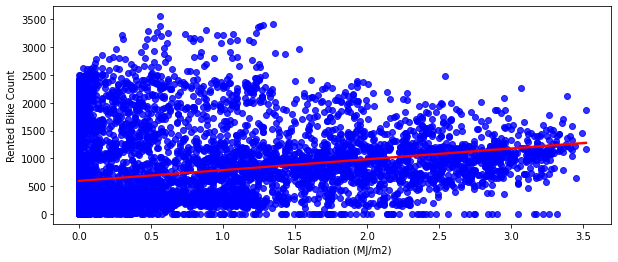

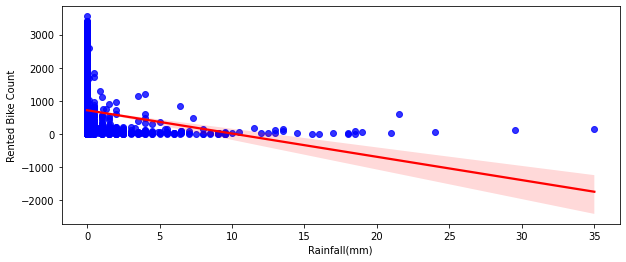

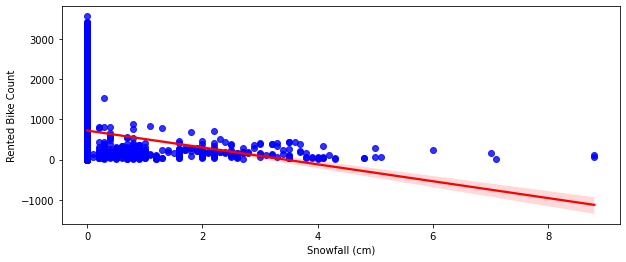

In [ ]:
#Checking the correlation between numerical variables and the dependent variable including dependent variable
# regplot for numeric features
for col in num_variables:
  fig,ax = plt.subplots(figsize=(10,4))
  sns.regplot(x=df[col], y=df['Rented Bike Count'], scatter_kws={'color': 'blue'}, line_kws={'color':'red'})


## **Heatmap Plot**

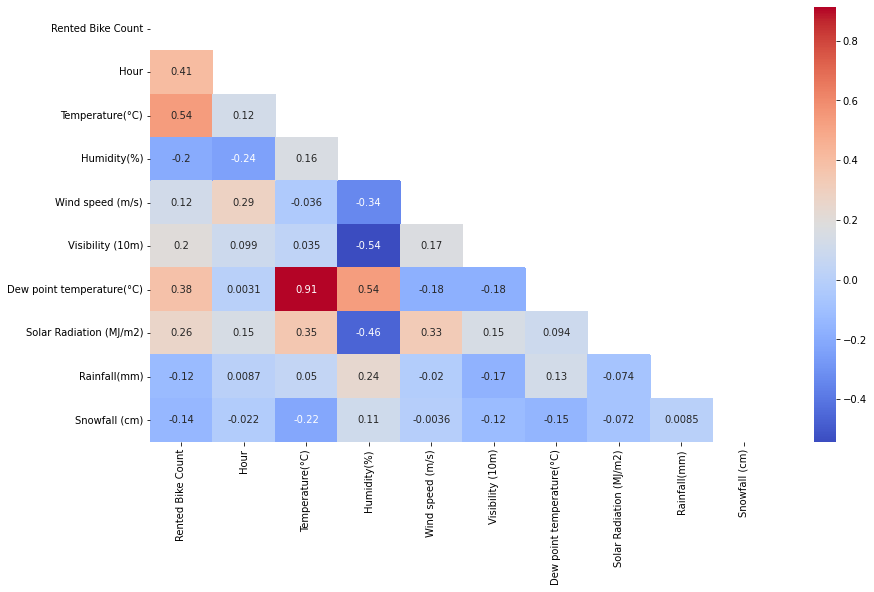

In [ ]:
# Let's check the correlation coefficients to see which Numerical variables are highly correlated by plotting a heat map. 
plt.figure(figsize = (14,8))
correlation= df.corr()
mask= np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation), mask=mask, annot=True, cmap='coolwarm')
plt.show()

# **Insights from the above Heatmap:**

## **1. The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.** ##
## **2. We can observe that the numeric variables Temperature and Dew Point Temperature exhibit a high correlation, Also humidity & visibiity(10m) have a good negative correlation.** ##
## **3. We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.** ##

In [ ]:
# We can observe that the features Temperature and Dew Point Temperature exhibit a high correlation. Therefore we will drop the column Dew Point temperature to prevent multicollinearity.
#Drop column
df.drop("Dew point temperature(°C)",axis=1,inplace=True)

# **Correlation Analysis**

# **Regression Plots vs. Temperature, Humidity and Windspeed**

### **Using seaborn to get regression plots with respect to Temperature, Humidity and Windspeed.**

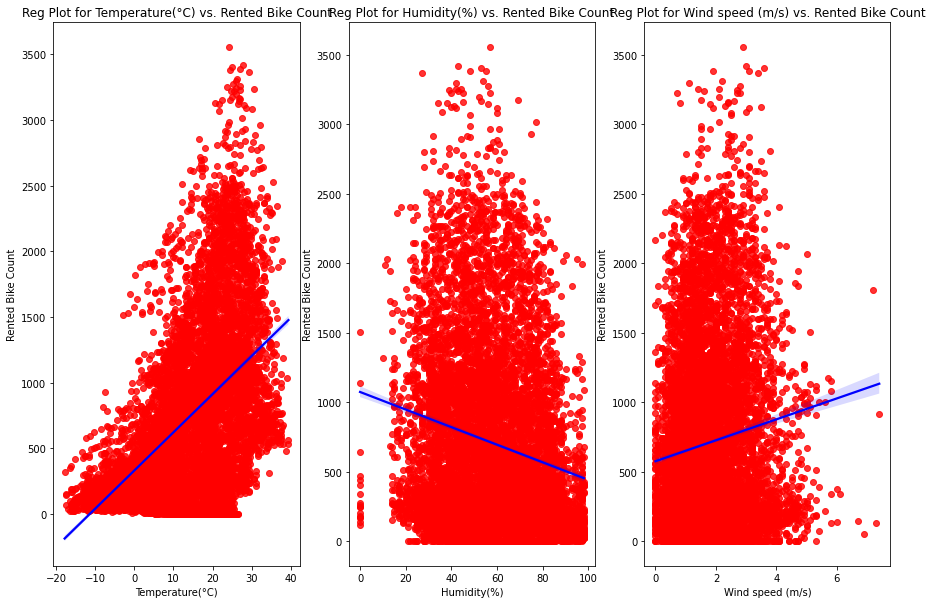

In [ ]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(15, 10))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=df, x='Temperature(°C)', y='Rented Bike Count',ax=axes, color='r', line_kws={'color':'blue'} )
axes.set(title='Reg Plot for Temperature(°C) vs. Rented Bike Count')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=df, x='Humidity(%)', y='Rented Bike Count',ax=axes, color='r',  line_kws={'color':'blue'})
axes.set(title='Reg Plot for Humidity(%) vs. Rented Bike Count')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=df, x='Wind speed (m/s)', y='Rented Bike Count',ax=axes, color='r',  line_kws={'color':'blue'})
axes.set(title='Reg Plot for Wind speed (m/s) vs. Rented Bike Count')
plt.show()

# **VIF Analysis**

**We use VIF analysis to check the level of collinearity among the independent and dependent variables.**

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

   #Function calling ... dropping the year column
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


VIF value is under 5. Therefore we assume that the multicollinearity between the independent variables is negligible. So now basicially it is good to build the linear regression model

## **Demand for rental bikes during different hours of the day**

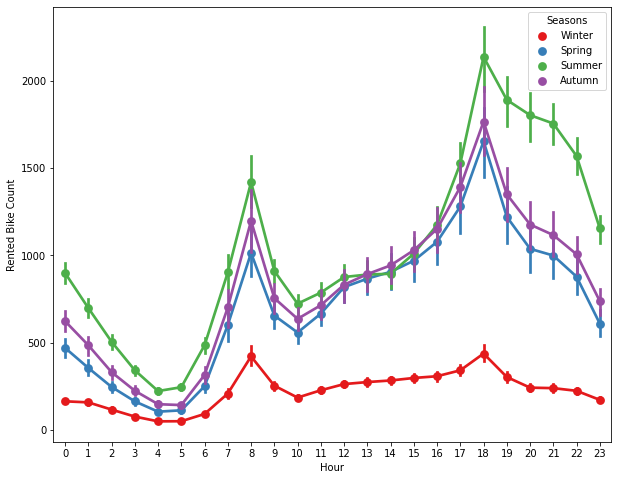

In [ ]:
plt.figure(figsize = (10, 8)) 
sns.pointplot(x ='Hour', y ='Rented Bike Count', data = df, palette='Set1', hue='Seasons')

1. People prefer to hire bikes during morning & evening hours, as seen by the sharp increase in rentals from 6:00 am to 9:00 am and 5 pm to 7 pm is the peak time.

2. We can claim that there is a lot of high demand at the opening and closing hours of offices because it is apparent that demand increases steadily at 10 a.m.

3. After 10:00 AM and through 6:00 PM, there is a steady increase in the demand for rental bikes.

4. The orange colour represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.

5. Early hours(1:00 AM to 6:00 AM) is when there is least demand for bicycles. Regardless,of the seasons, this has been the general trend noticed.

# **Visualizing Catagorical Variables**

In [ ]:
#Checking the data types
df.dtypes

Date                        object
Rented Bike Count            int64
Hour                         int64
Temperature(°C)            float64
Humidity(%)                  int64
Wind speed (m/s)           float64
Visibility (10m)             int64
Solar Radiation (MJ/m2)    float64
Rainfall(mm)               float64
Snowfall (cm)              float64
Seasons                     object
Holiday                     object
Functioning Day             object
dtype: object

In [ ]:
categorical_objects = df.describe(include=["object"]).columns.tolist()
print("Categorical variables are", categorical_objects)

Categorical variables are ['Date', 'Seasons', 'Holiday', 'Functioning Day']


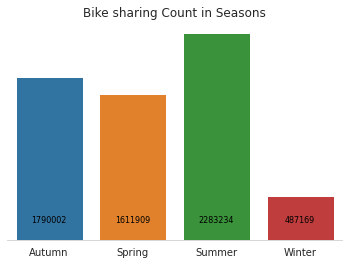

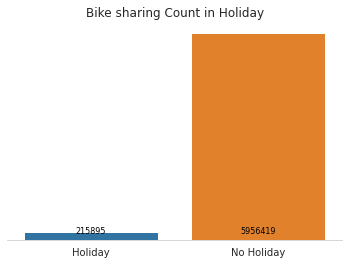

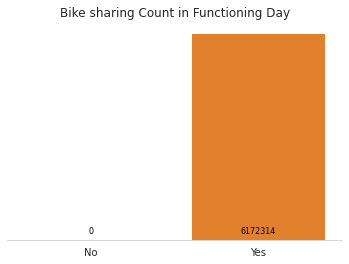

In [ ]:
# Plotting bar graph for categorical variables
sns.set_style("whitegrid")
for i in categorical_objects[1:]:  
  fig = plt.figure(figsize = (6,4))
  ax = fig.gca()
  
  if df[i].nunique() < 5:      #.... ensuring categorical variable with not more than 5 unique values are considerd
    df_sample = df.groupby([i]).sum().reset_index().iloc[:,:2]
    sns.barplot(data = df_sample, x = df_sample[i], y = 'Rented Bike Count',ci = None, ax = ax)  # ... Creating the bargrahph 
    plt.title('Bike sharing Count in ' + i)
    plt.xlabel('')
    plt.ylabel('')
    sns.despine(left = True)
    plt.yticks([])

    for j in range(len((df[i].unique()))):
      plt.text(x = j , y = 200000, s = df_sample.loc[j,'Rented Bike Count'],color='black', fontsize=8, horizontalalignment='center')

**Most number of Bikes are rented in Summer, followed by Autumn and Spring and Winter.**

**People prefer booking bikes on Working days more than the Holidays**.

**All the bikes were rented on the functioning day.**

## **Dealing with Outliers**

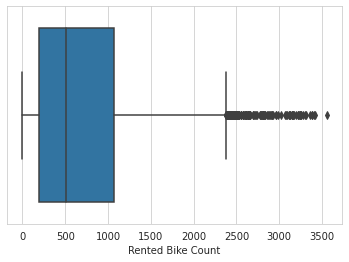

In [ ]:
# Checking for outliers in the dataset
sns.boxplot(data = df, x ='Rented Bike Count')

As we see there are many outliers in the dataset need to drop them for the accurate model predictions.

In [ ]:
# Defining the interquartile range for Dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_treatment(df['Rented Bike Count'])

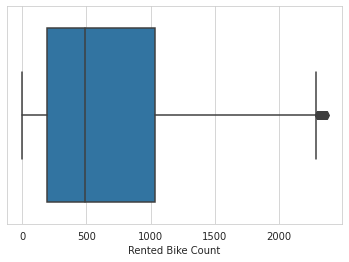

In [ ]:
# Removing outliers from the data
df_subset = df[(df['Rented Bike Count']>lower_bound) & (df['Rented Bike Count'] <upper_bound)]
sns.boxplot(data = df_subset, x = 'Rented Bike Count')

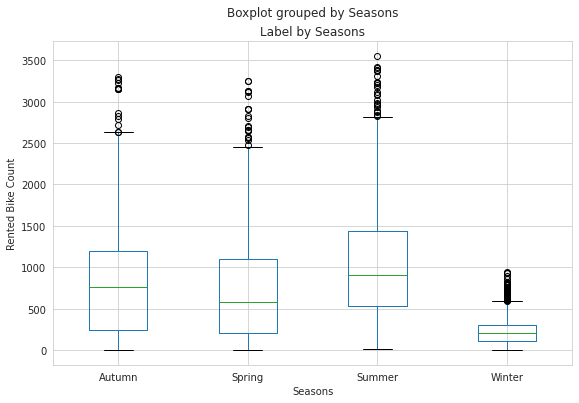

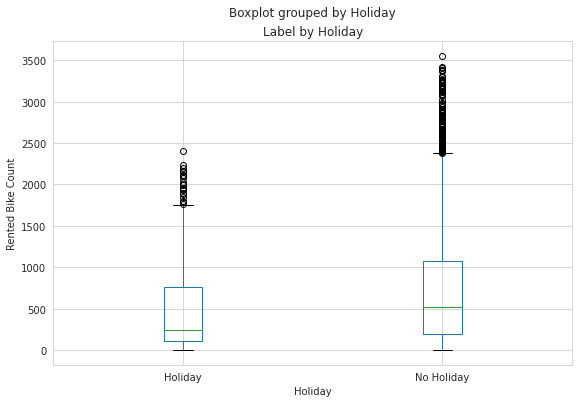

In [ ]:
#checking outliers for categorical variables by plotting boxplot
for col in categorical_objects:
  if col not in ["Date","Functioning Day"]:
      fig = plt.figure(figsize=(9, 6))
      ax = fig.gca()
      df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
      ax.set_title('Label by ' + col)
      ax.set_ylabel('Rented Bike Count')
plt.show()

In [ ]:
#Label encoding
label={'Holiday':{'Holiday':1,'No Holiday':0},'Functioning Day':{'Yes':0,'No':1}}
df = df.replace(label)

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'seasons'.
df['Seasons']= label_encoder.fit_transform(df['Seasons'])

#Obtain unique elements in "Seasons" 
df['Seasons'].unique()

array([3, 1, 2, 0])

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

In [ ]:
df['Seasons'].value_counts()

1    2208
2    2208
0    2184
3    2160
Name: Seasons, dtype: int64

In [ ]:
bike_data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
#Drop date column
df.drop(["Date"],axis=1,inplace=True)

In [ ]:
#List of important features
imp_features = df.describe(include="all").columns.tolist()
print(imp_features) #Important features after feature engineering are as follows..

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


# **Splitting Dataset Into Train & Test**

In [ ]:
#Defining independent variables
independent_variable = [elem for elem in imp_features if elem not in ['Rented Bike Count']]

In [ ]:
#Defining dependent variable
dependent_variable = ["Rented Bike Count"]

In [ ]:
from scipy.stats import zscore
#Applying zscore
X = df[independent_variable].apply(zscore)

In [ ]:
#Applying log1p transformation to the dependent variable
Y = np.log1p(df['Rented Bike Count'])

In [ ]:
print(Y)

0       5.541264
1       5.323010
2       5.159055
3       4.682131
4       4.369448
          ...   
8755    6.911747
8756    6.639876
8757    6.543912
8758    6.569481
8759    6.371612
Name: Rented Bike Count, Length: 8760, dtype: float64


In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split( X,Y , test_size = 0.2, random_state = 0) 
print('TRAINING DATA :', X_train.shape)
print('TESTING DATA :', X_test.shape)

TRAINING DATA : (7008, 11)
TESTING DATA : (1752, 11)


In [ ]:
from sklearn.preprocessing import *
#Scaling the features
#Creating an instance of the scaler
scaler=StandardScaler()
#Fitting scaler
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 0.50774916 -0.38874606  0.18996015 ...  1.35175828 -0.23202281
  -0.18254726]
 [ 0.9408263   1.29850393 -0.05608294 ...  0.45587006 -0.23202281
  -0.18254726]
 [-0.06968702  1.42379477 -0.05608294 ...  0.45587006 -0.23202281
  -0.18254726]
 ...
 [-0.06968702  1.05627497 -0.05608294 ...  0.45587006 -0.23202281
  -0.18254726]
 [-1.65763652 -0.38039334  0.0423343  ... -0.44001816 -0.23202281
  -0.18254726]
 [ 1.22954439 -0.48062601  1.22334111 ... -0.44001816 -0.23202281
  -0.18254726]]
[[-1.22455939 -0.17992799  0.73125494 ... -0.44001816 -0.23202281
  -0.18254726]
 [-1.36891843  0.73887151  0.97729803 ... -1.33590637 -0.23202281
  -0.18254726]
 [ 0.79646725 -0.7729713   0.337586   ...  1.35175828 -0.23202281
  -0.18254726]
 ...
 [-1.65763652 -0.2551025   1.37096697 ... -0.44001816 -0.23202281
  -0.18254726]
 [ 1.51826248 -0.04628443  0.337586   ... -1.33590637 -0.23202281
  -0.18254726]
 [-1.65763652 -0.21333888  0.43600324 ... -1.33590637 -0.23202281
  -0.18254726]]


# **Defining functions to get evalation metrics score and feature importance**

In [ ]:
def regression_results(actual_y, pred_y, X):
  
    "This function takes actual and predicted value of target, transform them back and return scores of evaluation metrics"
    
    #Reverse transforming the predicted output 
    y_true = np.expm1(actual_y)
    y_pred = np.expm1(pred_y)

    # Calculating regression metrics

    MAE = mean_absolute_error(y_true,y_pred)

    MSE  = mean_squared_error(y_true,y_pred)
    
    RMSE = np.sqrt(MSE)

    r2 = r2_score(y_true,y_pred)
    
    adj_r2 = 1-(1-r2)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
    
    return(round(MAE,2),round(MSE,2),round(RMSE,2),round(r2,2),round(adj_r2,2))

In [ ]:
def performance(model):
  
  #Doing prediction
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  
  #Calling the function regression_results
  train = regression_results(Y_train, y_train_pred, X_train)
  test = regression_results(Y_test, y_test_pred, X_test)

  # Storing the scores
  score = {'Metric' : ['MAE', 'MSE', 'RMSE', 'r2', "adj_r2"],
          'Train Score' : [train[0], train[1], train[2], train[3], train[4]],
          "Test Score": [test[0],test[1],test[2],test[3],test[4]]}

  # Create DataFrame
  df = pd.DataFrame(score)
  df.bike = model
  return(df)

In [ ]:
def feature_impo(model):
  '''This function takes instance of linear model as input and and return feature importance graph '''
 
  #Store the coefficients of the model into a dataframe
  coefficients = pd.DataFrame( model.coef_, columns=['Coefficients'], index=independent_variable)
 
  #Plot importance graph
  coefficients.plot(kind='barh', figsize=(9, 7))
  plt.title('Model')
  plt.axvline(x=0, color='.5')
  plt.subplots_adjust(left=.3)

  plt.show()

In [ ]:
def feature_importance(model):
 
  #Listing features
  features = independent_variable 
  #storing feature importance
  imp = model.feature_importances_
  indices = np.argsort(imp)
  #Plot the feature importance
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), imp[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

plt.show()

# **Linear Regression**

In [ ]:
#Fitting the model
regg = LinearRegression().fit(X_train, Y_train)

In [ ]:
#Model score
print("The model score is:",regg.score(X_train, Y_train))

The model score is: 0.7816077753951596


In [ ]:
#Obtaining the coefficients
regg.coef_

array([ 0.27344724,  0.60169029, -0.3241732 , -0.02130196,  0.02977144,
       -0.04217236, -0.24248698, -0.01032788, -0.22272405, -0.0818845 ,
       -1.14792033])

In [ ]:
#Intercept
print("Intercept of the model is:", regg.intercept_)

Intercept of the model is: 5.903208576573145


In [ ]:
#Prediction
y_pred_train = regg.predict(X_train)
y_pred_test = regg.predict(X_test)

In [ ]:
y_pred_test

array([5.64606376, 6.28533759, 5.45227601, ..., 5.27503075, 6.79545845,
       5.79869195])

In [ ]:
train_result_linear = regression_results(Y_train,y_pred_train,X_train)
test_result_linear =  regression_results(Y_test,y_pred_test,X_test)

In [ ]:
print("MAE, MSE, RMSE, r2 and adjusted r2 are:", train_result_linear)

MAE, MSE, RMSE, r2 and adjusted r2 are: (287.44, 202203.58, 449.67, 0.51, 0.51)


In [ ]:
print("Performance of linear regression")
performance(regg)

Performance of linear regression


,Metric,Train Score,Test Score
0,MAE,287.44,279.07
1,MSE,202203.58,195114.04
2,RMSE,449.67,441.72
3,r2,0.51,0.53
4,adj_r2,0.51,0.53


Linear regression - feature importance


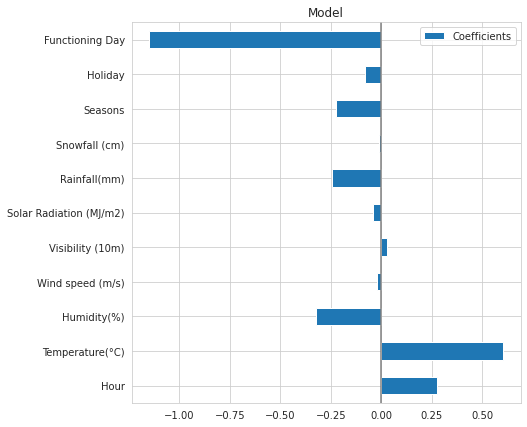

In [ ]:
print("Linear regression - feature importance")
feature_impo(regg)

## A model is said to best when the R2 score is close to 1 but here the model fails in terms of accuracy as the R2 score is 0.53

In [ ]:
import plotly.express as px

def residual_plot(actual_y, pred_y,header="dataset"):
  # Residual error  of training Dataset (Actual-Predicted)
  residual_df = pd.DataFrame(actual_y - pred_y)
  residual_df.head()

  # Residual plot for training data
  fig = px.scatter(residual_df)
  fig.update_layout(title_text='Residual plot for {} dataset'.format(header))
  fig.add_hline(y=0)
  fig.show()

## **LASSO REGRESSION**

In [ ]:
from sklearn.linear_model import Lasso
#Creating an instance of the model
lasso  = Lasso(alpha=0.001 , max_iter= 3000)
#Fitting the model
lasso.fit(X_train, Y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:
lasso.coef_

array([ 0.27269931,  0.59959428, -0.32118618, -0.02028541,  0.03002187,
       -0.03915446, -0.24175476, -0.00995899, -0.22173841, -0.08093343,
       -1.14666705])

In [ ]:
print("Lasso score :",lasso.score(X_train, Y_train))

Lasso score : 0.7816020533707941


In [ ]:
#Prediction
y_pred_lasso = lasso.predict(X_test)

In [ ]:
print("Performance of Lasso Regression")
performance(lasso)

Performance of Lasso Regression


,Metric,Train Score,Test Score
0,MAE,287.60,279.25
1,MSE,202526.81,195523.03
2,RMSE,450.03,442.18
3,r2,0.51,0.53
4,adj_r2,0.51,0.53


## The performance of lasso regression is also poor.

## **LASSO CROSS VALIDATION**

In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.5367512729774678


In [ ]:
lasso=lasso_regressor.best_estimator_

In [ ]:
y_pred_lasso_test = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

In [ ]:
#Storing lasso regression evaluation scores
train_result_lasso = regression_results(Y_train,y_pred_lasso_train,X_train)
test_result_lasso =  regression_results(Y_test,y_pred_lasso_test,X_test)

In [ ]:
print("Scores of Lasso after cross-validation and hyperparameter tuning")
performance(lasso)

Scores of Lasso after cross-validation and hyperparameter tuning


,Metric,Train Score,Test Score
0,MAE,287.44,279.07
1,MSE,202203.58,195114.04
2,RMSE,449.67,441.72
3,r2,0.51,0.53
4,adj_r2,0.51,0.53


Even after applying cross validation and hyper parameter tunning there has been no change in the lasso regression score.

Lasso Regression - Feature Importance


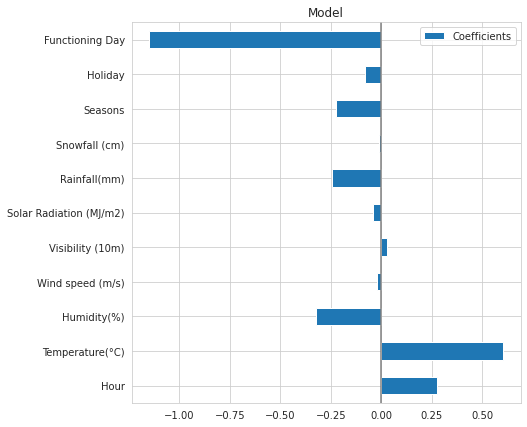

In [ ]:
print("Lasso Regression - Feature Importance")
feature_impo(lasso)

## **RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("alpha value :" ,ridge_regressor.best_params_)
print(" negative mean squared error : ", ridge_regressor.best_score_)

alpha value : {'alpha': 1}
 negative mean squared error :  -0.5359927444794051


In [ ]:
ridge=ridge_regressor.best_estimator_

In [ ]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_ridge_train = ridge.predict(X_train)

In [ ]:
#Storing ridge regression evaluation scores
train_result_ridge = regression_results(Y_train,y_pred_ridge_train,X_train)
test_result_ridge =  regression_results(Y_test,y_pred_ridge_test,X_test)

In [ ]:
print("Performance of Ridge Regression")
performance(ridge)

Performance of Ridge Regression


,Metric,Train Score,Test Score
0,MAE,287.45,279.08
1,MSE,202213.50,195127.98
2,RMSE,449.68,441.73
3,r2,0.51,0.53
4,adj_r2,0.51,0.53


The performance of ridge regression is also poor.

Ridge Regression-Feature Importance


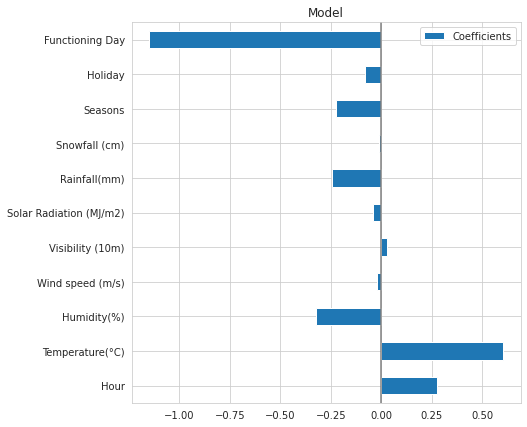

In [ ]:
print("Ridge Regression-Feature Importance")
feature_impo(ridge)

We can clearly see that the R2 score of linear regression is very poor.despite using regularization methods like cross validation and hyper parameter tunning there is no change in result, it's still poor.

Also we know that regularization method helps in fixing overfitting but here our model was not overfitted.

A possible reason of such low accuracy using the linear model would be low linear relationship & low correlation between target variable & independent variables.

## **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_random = RandomForestRegressor()
model_random.fit(X_train, Y_train)
Y_preds = model_random.predict(X_test)

In [ ]:
print("Random Forest Scores")
performance(model_random)

Random Forest Scores


,Metric,Train Score,Test Score
0,MAE,54.32,141.64
1,MSE,9348.78,56549.30
2,RMSE,96.69,237.80
3,r2,0.98,0.86
4,adj_r2,0.98,0.86


So here we can see the drastic change in the r2 & adj_r2 score as compared to linear regression.

Random forest regressor gives r2 & adj_r2 score of 0.87, 0.86.

Also we can see that r2 and adj_r2 both have different train and test score.

## **Random Forest Cross Validation**

In [ ]:
# Number of trees
n_estimators = [40,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,60]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,              'min_samples_leaf' : min_samples_leaf}

In [ ]:
print("alpha value :",parameter_dict)

alpha value : {'n_estimators': [40, 80, 100], 'max_depth': [4, 6, 8], 'min_samples_split': [50, 100, 150], 'min_samples_leaf': [40, 60]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestRegressor()

In [ ]:
# Grid search
rf_grid = RandomizedSearchCV(estimator=rf_model,scoring="neg_mean_squared_error",
                       param_distributions = parameter_dict,
                       cv = 5, verbose=2)

In [ ]:
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=150, n_estimators=40; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=150, n_estimators=40; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=150, n_estimators=40; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=150, n_estimators=40; total time=   0.4s
[CV] END max_depth=6,

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 60],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [40, 80, 100]},
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 50,
 'min_samples_leaf': 40,
 'max_depth': 8}

In [ ]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)

# Get the probabilities on train and test
y_pred_train_rf = rf_optimal_model.predict(X_train)
y_pred_test_rf = rf_optimal_model.predict(X_test)

In [ ]:
#Storing random forest regression evaluation scores
train_result_rf = regression_results(Y_train,y_pred_train_rf,X_train)
test_result_rf =  regression_results(Y_test,y_pred_test_rf,X_test)

In [ ]:
test_class_preds

array([5.26458069, 6.14237821, 5.7869601 , ..., 6.27543983, 6.97080556,
       6.28417838])

In [ ]:
print(" Best score",rf_grid.best_score_)

 Best score -0.2535283182390756


In [ ]:
print("performance of Random Forest after cross validation and hyperparameter tuning")
performance(rf_optimal_model)

performance of Random Forest after cross validation and hyperparameter tuning


,Metric,Train Score,Test Score
0,MAE,174.21,177.94
1,MSE,83192.01,88476.34
2,RMSE,288.43,297.45
3,r2,0.80,0.79
4,adj_r2,0.80,0.79


Here we can clearly see that before applying cross validation and hyper parameter tuning train score and test score were dissimilar as they had very big difference but after applying CV & HPT both score are almost identical.

Random Forest-Feature Importance


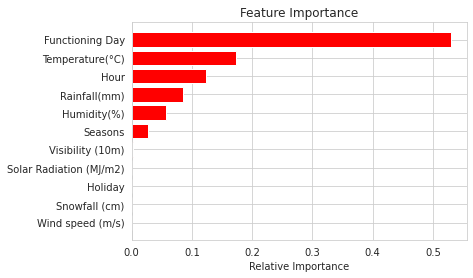

In [ ]:
print("Random Forest-Feature Importance")
feature_importance(rf_optimal_model)

In random forest the feature variable 'functioning day' has the highest impact on the dependent variable "Rented Bike count". The second most important feature is "Temperature".

## **GRADIENT BOOSTING MACHINE (GBM)**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Hyperparameter tuning

gbm = GradientBoostingRegressor() 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
gbm_model = GridSearchCV(gbm, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
gbm_model.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [ ]:
gbm_model.predict(X_test)


array([5.54881409, 6.30420496, 5.8550239 , ..., 6.02556502, 6.93637844,
       6.32224064])

In [ ]:
print("Evaluation metrics for GBM")
performance(gbm_model)

Evaluation metrics for GBM


,Metric,Train Score,Test Score
0,MAE,196.04,196.03
1,MSE,104082.42,108884.52
2,RMSE,322.62,329.98
3,r2,0.75,0.74
4,adj_r2,0.75,0.74


Here the train and test r2 and adjusted r2 are almost identical/same.

## **GBM CROSS VALIDATION**

In [ ]:
# Grid search
gbm = GradientBoostingRegressor() 

gbm_grid = RandomizedSearchCV(estimator=gbm,scoring="neg_mean_squared_error",
                       param_distributions = parameter_dict,
                       cv = 5, verbose=2)

gbm_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   0.4s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   0.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   0.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   0.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   0.6s
[CV] END max_depth=8, min_samp

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 60],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [40, 80, 100]},
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
gbm_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50, n_estimators=80)

In [ ]:
gbm_optimal_model = gbm_grid.best_estimator_

In [ ]:
gbm_grid.best_params_

{'n_estimators': 80,
 'min_samples_split': 50,
 'min_samples_leaf': 40,
 'max_depth': 8}

In [ ]:
# Making predictions on train and test data

train_class_preds = gbm_optimal_model.predict(X_train)
test_class_preds = gbm_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = gbm_optimal_model.predict(X_train)
test_preds = gbm_optimal_model.predict(X_test)

In [ ]:
y_pred_train_gbm =  gbm_optimal_model.predict(X_train)
y_pred_test_gbm  = gbm_optimal_model.predict(X_test)

In [ ]:
#Storing gradient boosting machine evaluation scores
train_result_gbm = regression_results(Y_train,y_pred_train_gbm,X_train)
test_result_gbm =  regression_results(Y_test,y_pred_test_gbm,X_test)

In [ ]:
print("Scores of GBM after cross-validation and hyperparameter tuning")
performance(gbm_optimal_model)

Scores of GBM after cross-validation and hyperparameter tuning


,Metric,Train Score,Test Score
0,MAE,127.27,143.68
1,MSE,43661.96,57916.74
2,RMSE,208.95,240.66
3,r2,0.89,0.86
4,adj_r2,0.89,0.86


After applying cross validation and hyper parameter tuning we can see the change in the r2 and adjusted r2 score for train and test data.

Gradient boosting machine-Feature Importance


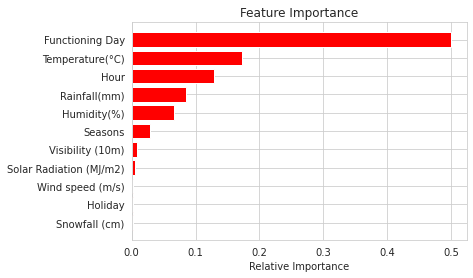

In [ ]:
print("Gradient boosting machine-Feature Importance" )
feature_importance(gbm_optimal_model)

In GBM also the feature variable 'functioning day' has the highest impact on the dependent variable "Rented Bike count" and the second most important feature is "Temperature".

## **XGBOOST**

In [ ]:
import xgboost as xgb

In [ ]:
# Instantiation
xgb = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 1000, seed = 123)
  
# Fitting the model
xgb.fit(X_train, Y_train)
  
# Predict the model
pred = xgb.predict(X_test)

[14:55:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("Evaluation metrics for XGBoost")
performance(xgb)

Evaluation metrics for XGBoost


,Metric,Train Score,Test Score
0,MAE,120.88,146.87
1,MSE,39415.53,59618.05
2,RMSE,198.53,244.17
3,r2,0.91,0.86
4,adj_r2,0.90,0.86


As we can see that XGBOOST gives the best r2 and adj_r2 score among all other models.

In [ ]:
# run randomized search
from sklearn.model_selection import cross_val_score
cross_val_score(xgb,X_train,Y_train,scoring='r2')


[14:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:55:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:55:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.92411057, 0.92602036, 0.93066048, 0.90627341, 0.92827348])

## **XGBOOST CROSS VALIDATION**

In [ ]:
import xgboost as xgboost

In [ ]:
parameters = {
    'n_estimators':[500],
    'max_depth': [4,6,8],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'eval_metric': ['rmse']}

xgb = xgboost.XGBRegressor(nthread=-1)

n_iter_search = 100
xgb_grid = RandomizedSearchCV(xgb, param_distributions=parameters, n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

xgb_grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=XGBRegressor(nthread=-1), n_iter=100,
                   param_distributions={'eval_metric': ['rmse'],
                                        'max_depth': [4, 6, 8],
                                        'n_estimators': [500],
                                        'objective': ['reg:squarederror',
                                                      'reg:tweedie']},
                   scoring='neg_mean_squared_error')

In [ ]:
xgb_grid.best_params_

{'objective': 'reg:squarederror',
 'n_estimators': 500,
 'max_depth': 6,
 'eval_metric': 'rmse'}

In [ ]:
xgb_grid.best_estimator_

XGBRegressor(eval_metric='rmse', max_depth=6, n_estimators=500, nthread=-1,
             objective='reg:squarederror')

In [ ]:
xgb_optimal_model=xgb_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

train_class_preds = xgb_optimal_model.predict(X_train)
test_class_preds = xgb_optimal_model.predict(X_test)


# Get the probabilities on train and test
y_pred_train_xgb = xgb_optimal_model.predict(X_train)
y_pred_test_xgb = xgb_optimal_model.predict(X_test)


In [ ]:
#Storing xgboost regression evaluation scores
train_result_xgb = regression_results(Y_train,y_pred_train_xgb,X_train)
test_result_xgb =  regression_results(Y_test,y_pred_test_xgb,X_test)

In [ ]:
print("Evaluation metrics for XGBoost after cross-validation and hyperparameter tuning")
performance(xgb_optimal_model)

Evaluation metrics for XGBoost after cross-validation and hyperparameter tuning


,Metric,Train Score,Test Score
0,MAE,75.20,139.62
1,MSE,16533.00,54594.92
2,RMSE,128.58,233.66
3,r2,0.96,0.87
4,adj_r2,0.96,0.87


XGBoost-Feature Importance


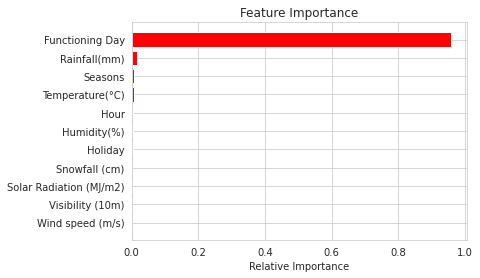

In [ ]:
print("XGBoost-Feature Importance") 
feature_importance(xgb_optimal_model)

In GBM also the feature 'functioning day' has the highest impact on the dependent variable "Rented Bike count" and the second most important feature here is "Rainfall".

## **Summary table of scores of different ML model after cross validation & hyper parameter tuning.**

In [ ]:
regresser = ['Linear ', 'Lasso ', 'Ridge', 'Random Forest CV', 'GBMCV' , 'XGboost CV']

#different evaluation scores of ml models
train_MAE = [train_result_linear[0],train_result_lasso[0],train_result_ridge[0],train_result_rf[0],train_result_gbm[0],train_result_xgb[0]]
test_MAE = [test_result_linear[0],test_result_lasso[0],test_result_ridge[0],test_result_rf[0],test_result_gbm[0],test_result_xgb[0]]

train_MSE = [train_result_linear[1],train_result_lasso[1],train_result_ridge[1],train_result_rf[1],train_result_gbm[1],train_result_xgb[1]]
test_MSE = [test_result_linear[1],test_result_lasso[1],test_result_ridge[1],test_result_rf[1],test_result_gbm[1],test_result_xgb[1]]

train_RMSE = [train_result_linear[2],train_result_lasso[2],train_result_ridge[2],train_result_rf[2],train_result_gbm[2],train_result_xgb[2]]
test_RMSE = [test_result_linear[2],test_result_lasso[2],test_result_ridge[2],test_result_rf[2],test_result_gbm[2],test_result_xgb[2]]

train_r2 = [train_result_linear[3],train_result_lasso[3],train_result_ridge[3],train_result_rf[3],train_result_gbm[3],train_result_xgb[3]]
test_r2 = [test_result_linear[3],test_result_lasso[3],test_result_ridge[3],test_result_rf[3],test_result_gbm[3],test_result_xgb[3]]

train_adj_r2 = [train_result_linear[4],train_result_lasso[4],train_result_ridge[4],train_result_rf[4],train_result_gbm[4],train_result_xgb[4]]
test_adj_r2 = [test_result_linear[4],test_result_lasso[4],test_result_ridge[4],test_result_rf[4],test_result_gbm[4],test_result_xgb[4]]

In [ ]:
#Creating a dataframe of scores of all the models after cross validation and hyper parameter tuning
evalation_matrix=pd.DataFrame({'Model':regresser, 'Train MAE': train_MAE, 'Test MAE': test_MAE, 'Train MSE': train_MSE, 'Test MSE': test_MSE, 'Train RMSE': train_RMSE, 'Test RMSE': test_RMSE,
              'Train r2': train_r2, 'Test r2': test_r2, 'Train adj r2': train_adj_r2, 'Test adj r2': test_adj_r2})
print("Evaluation metrics for different ML algorithms:")
evalation_matrix

Evaluation metrics for different ML algorithms:


,Model,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train r2,Test r2,Train adj r2,Test adj r2
0,Linear,287.44,279.07,202203.58,195114.04,449.67,441.72,0.51,0.53,0.51,0.53
1,Lasso,287.44,279.07,202203.58,195114.04,449.67,441.72,0.51,0.53,0.51,0.53
2,Ridge,287.45,279.08,202213.50,195127.98,449.68,441.73,0.51,0.53,0.51,0.53
3,Random Forest CV,174.21,177.94,83192.01,88476.34,288.43,297.45,0.80,0.79,0.80,0.79
4,GBMCV,127.27,143.68,43661.96,57916.74,208.95,240.66,0.89,0.86,0.89,0.86
5,XGboost CV,75.20,139.62,16533.00,54594.92,128.58,233.66,0.96,0.87,0.96,0.87


1. R2 score in Linear Regression is 0.51 for the train data and 0.53 for the test data. Thus the Linear Regression model fails in this case.

2. Comparing the R2 score of all the models, one can see that XGBoost performs better than other models.

3. Gradient Boosting Machine has a test accuracy of 86%, making it the second-best model.

4. Random Forest is also found to perform well on the data.

## **OBSERVATIONS**

## 1. The feature variable Functioning Day has the highest impact on the dependent variable Rented Bike Count.
## 2. In Random Forest and GBM, Temperature is making an impact while Rainfall is the second most important factor in XGBOOST.
## 3. Random Forest & GBM gives importance to 6-7 features                 while XGBOOST considers only the top 3-4 features and almost neglects all the rest.

## **CONCLUSION**

* The project focuses on predicting bike sharing demand using the Seoul dataset.
* In this prediction we used different models and after getting the evaluation score we came to a conclusion that out of all the models used XGBOOST performs the best with the train R2 score of 0.96 & the test R2 of 0.87.
* XGboost gives the least MAE among the models. The most important features for predicting the dependent variable (number of hired bikes) for XGBoost are functioning day, rainfall, season, and temperature.
* This project will be helpful for the company to predict the hourly bike demand and enhance the user experience.